<a href="https://colab.research.google.com/github/leowu4ever/Jupyter-Notebooks/blob/master/s%26p%20test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df = pd.read_excel('household_power_demand.xlsx', index_col=0)

In [75]:
df.head(10)

,household income (GBP/month),size (m2),number of solar panels,occupation,no. of adults,no. of children,monthly power demand from grid (kWh)
0,1103,47,0,metal worker,3,4,956.051758
1,1114,130,5,Politician,2,4,689.405788
2,1130,87,0,politician,2,3,831.260063
3,1255,94,3,police,1,4,716.089012
4,1262,94,5,carpenter,2,1,767.914414
5,1269,63,0,baker,2,3,643.437868
6,1289,108,0,baker,2,2,843.564297
7,1318,61,3,metalworker,2,0,655.414086
8,1330,87,0,baker,1,1,509.969317
9,1333,128,3,politician,2,4,787.735267


The dataset has no missing values which is very good.

In [16]:
df.isna().sum()

household income (GBP/month)            0
size (m2)                               0
number of solar panels                  0
occupation                              0
no. of adults                           0
no. of children                         0
monthly power demand from grid (kWh)    0
dtype: int64

In [104]:
df.iloc[:,3].astype('category')

0      metal worker
1        Politician
2        politician
3            police
4         carpenter
           ...     
995           baker
996           baker
997           baker
998    metal worker
999           baker
Name: occupation, Length: 1000, dtype: category
Categories (8, object): [Politician, baker, carpenter, cop, metal worker, metalworker, police,
                         politician]

creating box plots, histogram for each column

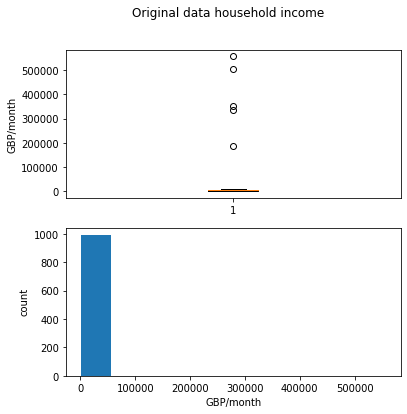

In [66]:
import matplotlib.pyplot as plt
data = df.iloc[:,0]
fig, axs = plt.subplots(2, figsize=(6,6))
fig.suptitle('Original data household income')
axs[0].boxplot(data)
axs[0].set_ylabel('GBP/month')
axs[1].hist(data, bins=10)
axs[1].set_xlabel('GBP/month')
axs[1].set_ylabel('count');

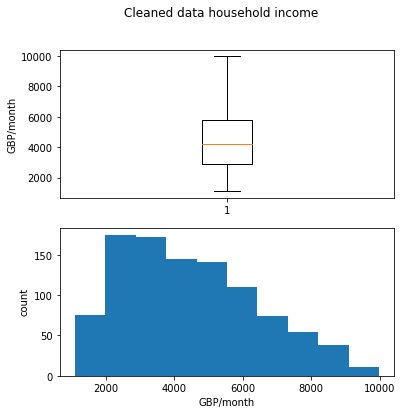

In [93]:
data = df[df[df.columns[0]]<100000].iloc[:,0]
fig, axs = plt.subplots(2, figsize=(6,6))
fig.suptitle('Cleaned data household income')
axs[0].boxplot(data)
axs[0].set_ylabel('GBP/month')
axs[1].hist(data, bins=10)
axs[1].set_xlabel('GBP/month')
axs[1].set_ylabel('count');

It seems household income has some extreme data. It is better to remove then first

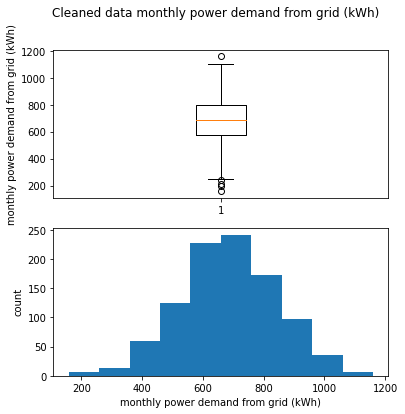

In [135]:
import matplotlib.pyplot as plt
col_num = 6
data = df[(df[df.columns[0]]<100000) & (df[df.columns[5]]<10)].iloc[:,col_num]
fig, axs = plt.subplots(2, figsize=(6,6))
fig.suptitle('Cleaned data ' + df.columns[col_num])
axs[0].boxplot(data)
axs[0].set_ylabel(df.columns[col_num])
axs[1].hist(data, bins=10)
axs[1].set_xlabel(df.columns[col_num])
axs[1].set_ylabel('count');

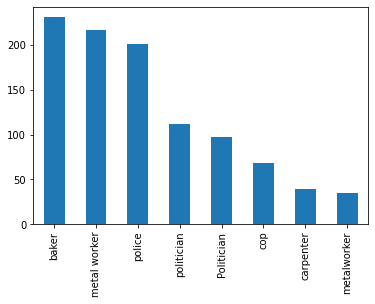

In [125]:
df[df.columns[3]].value_counts().plot(kind='bar')

In [128]:
df.iloc[:,3].unique()

array(['metal worker', 'Politician', 'politician', 'police', 'carpenter',
       'baker', 'metalworker', 'cop'], dtype=object)

In [136]:
import pandas as pd
import numpy as np

corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,household income (GBP/month),size (m2),number of solar panels,no. of adults,no. of children,monthly power demand from grid (kWh)
household income (GBP/month),1.000000,0.061350,-0.022696,0.016322,0.046012,0.044902
size (m2),0.061350,1.000000,0.026554,0.003737,-0.009602,0.530187
number of solar panels,-0.022696,0.026554,1.000000,-0.011409,0.027489,-0.458932
no. of adults,0.016322,0.003737,-0.011409,1.000000,0.000795,0.195257
no. of children,0.046012,-0.009602,0.027489,0.000795,1.000000,0.033238
monthly power demand from grid (kWh),0.044902,0.530187,-0.458932,0.195257,0.033238,1.000000


In [164]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X = data.iloc[:, 1:3]
y = data.iloc[:,6]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
regressor = linear_model.LinearRegression()
data = df[(df[df.columns[0]]<100000) & (df[df.columns[5]]<10)]
model = regressor.fit(X_train, y_train)
print('intercept' + str(model.intercept_))
print('intercept' + str(model.coef_))
y_pred = regressor.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

intercept500.5523799570292
intercept[  2.55589769 -27.32018803]
Mean Absolute Error: 86.97554971142411
Mean Squared Error: 12434.142226365255
Root Mean Squared Error: 111.50848499717523
